In [2]:
import numpy as np

Ejercicio I-A

Funcion matrix_multiplication

In [2]:
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray)-> np.ndarray:
    if m_1.shape[1] != m_2.shape[0]:
        raise Exception("Matrices are not compatible")
    
    n = m_1.shape[1] # elements in the column/row
    m_result = np.zeros([m_1.shape[0], m_2.shape[1]])

    for row in range(m_1.shape[0]):
        for column in range(m_2.shape[1]):
            for k in range(n):
                m_result[row][column] += m_1[row][k] * m_2[k][column]
    
    return m_result

Timing matrix multiplication:

In [40]:
import time

l_timings = []
for i in range(20, 31):
    dim = 10 + (i**2)
    m = np.random.permutation(list(range(dim)))
    timings = %timeit -o -n 10 -r 5 -q min_heap_sort(m)
    l_timings.append([dim, timings.best])

In [13]:
l_timings = [[110, 0.8806797715020366, 4.999600350856781e-05],
 [131, 1.4896154268993995, 6.558148888871073e-05],
 [154, 2.4286194882006384, 0.00010191330220550298],
 [179, 3.815289124206174, 0.0001489141024649143],
 [206, 5.841517368401401, 0.00017917939694598318],
 [235, 8.614339522109367, 0.00026926090940833093],
 [266, 12.554266186093447, 0.00032384799560531975],
 [299, 17.870312900294085, 0.00046448600478470324],
 [334, 24.939844528899993, 0.0006174301961436868],
 [371, 34.27747976350365, 0.0009155842941254378],
 [410, 46.29548591380008, 0.0011800882988609374]]

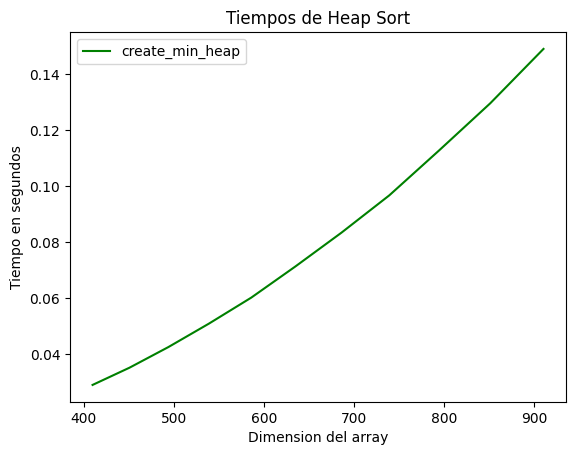

In [41]:
#Line chart
from matplotlib import pyplot as plt

dimensions = [i[0] for i in l_timings] 
time_matrix_multiplication = [i[1] for i in l_timings] 
# time_dot = [i[2] for i in l_timings]

#Crear un gráfico de líneas
plt.plot(dimensions, time_matrix_multiplication, color= 'green', marker='none', linestyle = 'solid', label="create_min_heap")
# plt.plot(dimensions, time_dot, color= 'blue', marker='none', linestyle = 'solid', label="numpy dot")

#Añadir un título al gráfico
plt.title("Tiempos de Heap Sort")

#Añadir etiqueta al eje x y y (x-axis y y-axis)
plt.ylabel("Tiempo en segundos")
plt.xlabel("Dimension del array")

#Mostrar
plt.legend(loc="upper left")
plt.show()

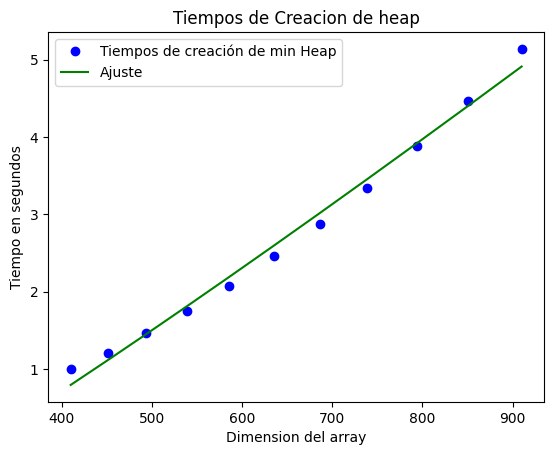

In [42]:
from scipy.optimize import curve_fit
import math

def tofit(x, a, b):
    return a * (x * np.log(x)) + b # f(x) = x**3 for matrix mult

l_timings = np.array(l_timings)

x = l_timings[: , 0]
y = l_timings[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
a, b = pars
plt.plot(x, y, 'o', label='Tiempos de creación de min Heap', color='blue')
plt.plot(x, tofit(x, a, b), label='Ajuste', color='green')

#Añadir un título al gráfico
plt.title("Tiempos de Creacion de heap")

#Añadir etiqueta al eje x y y (x-axis y y-axis)
plt.ylabel("Tiempo en segundos")
plt.xlabel("Dimension del array")

#plt.legend()
#plt.show()

# x1 = l_timings[: , 0]
# y1 = l_timings[: , 1]
# y1 = y1 / y1[0] #normalizar timings
# pars, _ = curve_fit(tofit, x1, y1)
# a, b = pars
# plt.plot(x1, y1, 'bo', label='Datos ite')
# plt.plot(x1, tofit(x1, a, b), label='Ajuste ite')
plt.legend()
plt.show()


## Min heap

In [4]:
def min_heapify(h: np.ndarray, i: int):
    """Heapifica el ndarray h desde el subarbol que empieza en i.

    Args:
        h (np.ndarray): Min heap
        i (int): Nodo desde donde aplicamos Heapify.
    """

    heapifying = True

    while heapifying:
        smallest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < len(h) and h[i] > h[left]:
            smallest = left
        if right < len(h) and h[smallest] > h[right]:
            smallest = right

        if smallest != i:
            h[i], h[smallest] = h[smallest], h[i]
            i = smallest
        else:
            heapifying = False


def insert_min_heap(h: np.ndarray, k: int) -> np.ndarray:
    """Inserta el valor k en el array h, conservando el min_heap

    Args:
        h (np.ndarray): min heap
        k (int): valor a insertar

    Returns:
        np.ndarray: min heap con el valor k añadido
    """
    h = np.array(list(h) + [k])
    last = len(h) - 1

    while last > 0 and h[(last - 1) // 2] > h[last]:
        h[(last - 1) // 2], h[last] = h[last], h[(last - 1) // 2]
        last = (last - 1) // 2

    return h


def create_min_heap(h: np.ndarray):
    """Convierte el ndarray h en un min_heap

    Args:
        h (np.ndarray): Lista a convertir a ndarray
    """
    i = ((len(h) - 1) - 1) // 2
    while i > -1:
        min_heapify(h, i)
        i -= 1


In [24]:
from typing import Tuple


def pq_ini() -> np.ndarray:
    """Inicializa una Priority Queue (min heap) vacia

    Returns:
        np.ndarray: Priority queue
    """
    return np.empty(0)


def pq_insert(h: np.ndarray, k: int) -> np.ndarray:
    """Añade el elemento k a la Priority Queue h

    Args:
        h (np.ndarray): Priority Queue
        k (int): elemento a añadir

    Returns:
        np.ndarray: PQ h con el elemento k añadido
    """
    return insert_min_heap(h, k)


def pq_remove(h: np.ndarray) -> Tuple[int, np.ndarray]:
    """Saca de la PQ el elemento con mas prioridad. Como es un min heap, el de menor valor

    Args:
        h (np.ndarray): Priority Queue

    Returns:
        Tuple[int, np.ndarray]: (valor, PQ sin el valor sacado)
    """
    value, h = h[0], h[1:]
    create_min_heap(h)
    return value, h


pq = pq_ini()

pq = pq_insert(pq, 2)
pq = pq_insert(pq, 17)
pq = pq_insert(pq, 63)
pq = pq_insert(pq, 32)
pq = pq_insert(pq, 10)
pq = pq_insert(pq, 9)
pq = pq_insert(pq, 25)
pq = pq_insert(pq, 29)
pq = pq_insert(pq, 30)
pq = pq_insert(pq, 13)
pq = pq_insert(pq, 47)
pq = pq_insert(pq, 1)
pq = pq_insert(pq, 6)
pq = pq_insert(pq, 35)
pq = pq_insert(pq, 12)

pq

value, pq = pq_remove(pq)

print(value, pq)


pq = pq_insert(pq, 1)

1 [ 2  6  9 13 10 12 25 30 17 47 63 29 35 32]


In [25]:
def min_heap_sort(h: np.ndarray) -> np.ndarray:
    """Utiliza el min heap para ordenar el array h

    Args:
        h (np.ndarray): Array a ordenar

    Returns:
        np.ndarray: Array ordenado.
    """
    create_min_heap(h)
    srtd_list = []

    while len(h) > 0:
        element, h = pq_remove(h)
        srtd_list.append(element)

    return np.array(srtd_list)


print(min_heap_sort(np.array([27,12,31,4,2,32,53,13,52,372,74537,1,95,88,64])))

[    1     2     4    12    13    27    31    32    52    53    64    88
    95   372 74537]


In [22]:
import math
from io import StringIO
#source https://bit.ly/38HXSoU
def show_tree(tree, total_width=60, fill=' '):
    """Pretty-print a tree.
    total_width depends on your input size"""
    output = StringIO()
    last_row = -1
    for i, n in enumerate(tree):
        if i:
            row = int(math.floor(math.log(i+1, 2)))
        else:
            row = 0
        if row != last_row:
            output.write('\n')
        columns = 2**row
        col_width = int(math.floor((total_width * 1.0) / columns))
        output.write(str(n).center(col_width, fill))
        last_row = row
    print (output.getvalue())
    print ('-' * total_width)
    return


In [23]:
def checkMinHeap(A, i):
 
    # if `i` is a leaf node, return true as every leaf node is a heap
    if 2*i + 2 > len(A):
        return True
 
    # if `i` is an internal node
 
    # recursively check if the left child is a heap
    left = (A[i] <= A[2*i + 1]) and checkMinHeap(A, 2*i + 1)
 
    # recursively check if the right child is a heap (to avoid the list index out
    # of bounds, first check if the right child exists or not)
    right = (2*i + 2 == len(A)) or (A[i] <= A[2*i + 2]
                                    and checkMinHeap(A, 2*i + 2))
 
    # return true if both left and right child are heaps
    return left and right

min_h = [0 , 1,  3 , 7 , 6 ,13 ,17, 10, 12,  9]
checkMinHeap(min_h, 0)
show_tree(min_h)


                             0                              
              1                             3               
       7              6              13             17      
   10     12     9   
------------------------------------------------------------
